# Example over time

Examples so far have shown how to use aurel to automatically calculate relativistic terms for a given coordinate time. In practice you may be interested in seeing how these quantities evolve over time. For this the aurel package has the function `over_time` to do this, here we demonstrate how this is used.

First we need a big dictionnary containing the spacetime/matter: 

In [1]:
import numpy as np
import aurel
from aurel.solutions import LCDM as sol

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
# Define grid and finite difference class
param = { 'Nx': 64, 'Ny': 64, 'Nz': 64,
          'xmin': 0.0, 'ymin': 0.0, 'zmin': 0.0,
          'dx': 20.0, 'dy': 20.0, 'dz': 20.0}
fd = aurel.FiniteDifference(param)
x, y, z = fd.cartesian_coords

# Generate data for Lamnbda-CDM solution
Nt = 20
tarray = np.linspace(1, 10, Nt)
data = {key:[] for key in ['t', 'gammadown3', 'Kdown3', 'rho0']}
for t in tarray:
    data['t'] += [t]
    data['gammadown3'] += [sol.gammadown3(t, x, y, z)]
    data['Kdown3'] += [sol.Kdown3(t, x, y, z)]
    data['rho0'] += [sol.rho(t)*np.ones((fd.Nx, fd.Ny, fd.Nz))]
print('Data keys:', list(data.keys()))

4th order finite difference schemes are defined
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0']


## Calculate any quantity from `aurel.descriptions.keys()`

Processing t = 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in']


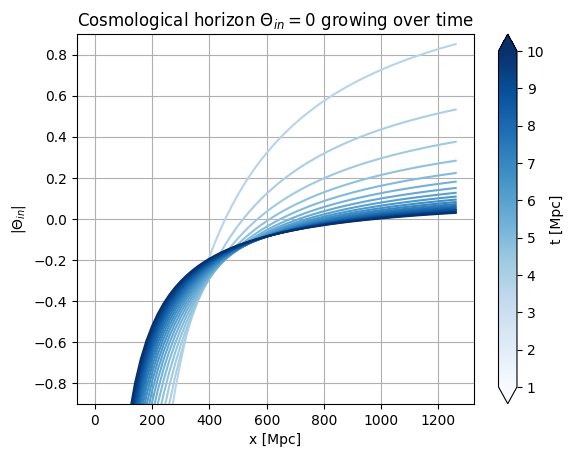

In [3]:
# Calculate further terms with AurelCore iterated over time
data = aurel.over_time(data, fd, vars=['null_ray_exp_in'], 
                       Lambda=sol.Lambda)
# all aurel kwargs can be passed here
print('Data keys:', list(data.keys()))

# Plot Cosmological horizon over time
Bcolors = cm.Blues(np.linspace(0.3, 1, Nt))
for i in range(Nt):
    plt.plot(fd.xarray, data['null_ray_exp_in'][i][:,0,0], color=Bcolors[i])
plt.grid()
plt.ylim(-0.9, 0.9)
plt.xlabel(r'x [Mpc]')
plt.ylabel(r"$|\Theta_{in}|$")
plt.title(r'Cosmological horizon $\Theta_{in} = 0$ growing over time')

# Colorbar
norm = mcolors.Normalize(vmin=min(data['t']), vmax=max(data['t']))
sm = cm.ScalarMappable(cmap=cm.Blues, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), extend='both')
cbar.set_label(r"t [Mpc]")

## Calculate your custom quantity over time

In [4]:
# Example of custom function to calculate backreaction
# Custom function must only take one argument, the AurelCore class instance
def backreaction(rel):
    """ Example function """
    sqrgdet = np.sqrt(rel['gammadet'])
    dcube = rel.fd.dx * rel.fd.dy * rel.fd.dz
    volume = np.sum(sqrgdet) * dcube
    av_theta = np.sum(rel['theta'] * sqrgdet) * dcube / volume
    av_theta2 = np.sum((rel['theta']**2) * sqrgdet) * dcube / volume
    av_shear2 = np.sum(rel['shear2'] * sqrgdet) * dcube / volume
    return (2/3)*(av_theta2 - av_theta**2) - 2*av_shear2

# Custom function are passed as dict with name and function
data = aurel.over_time(data, fd, vars=[{'backreaction': backreaction}], 
                       Lambda=sol.Lambda)
print('Data keys:', list(data.keys()))

# This is homogeneous, so the backreaction should be zero
print('Backreaction values:', data['backreaction'])

Validating variable function 'backreaction'...
✓ Custom function 'backreaction' validated successfully
Processing t = 1.0


<IPython.core.display.Latex object>

Calculating custom variable 'backreaction'...


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Calculated and freezed variable 'backreaction' in AurelCore
Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in', 'backreaction']
Backreaction values: [-3.55271368e-15 -1.62832710e-15  0.00000000e+00  0.00000000e+00
 -2.59052039e-16  0.00000000e+00 -8.07271281e-33 -5.55111512e-17
  1.85037171e-17  7.40148683e-17  3.70074342e-17 -9.25185854e-18
  4.62592927e-17 -1.85037171e-17 -9.25185854e-18  4.16333634e-17
 -9.47791116e-34  9.25185854e-18  2.77555756e-17  1.85037171e-17]


In [5]:
# Example of custom function with custom extra kwarg
def custom_function(rel):
    """ Example function """
    return rel['gdet'] * rel.my_value

# Custom function are passed as dict with name and function
data = aurel.over_time(data, fd, vars=[{'custom_function': custom_function}], 
                       Lambda=sol.Lambda, my_value=42)
print('Data keys:', list(data.keys()))

Validating variable function 'custom_function'...
✓ Custom function 'custom_function' validated successfully
Processing t = 1.0


<IPython.core.display.Latex object>

Calculating custom variable 'custom_function'...


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Calculated and freezed variable 'custom_function' in AurelCore
Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in', 'backreaction', 'custom_function']


## Calculate any estimation from `aurel.est_functions.keys()`

In [6]:
print('Available estimations:', list(aurel.est_functions.keys()))

Available estimations: ['max', 'mean', 'median', 'min', 'sum', 'std', 'var', 'maxabs', 'minabs', 'meanabs', 'medianabs', 'sumabs', 'stdabs', 'varabs', 'OD', 'UD']


In [7]:
# Calculate further terms with AurelCore iterated over time
data = aurel.over_time(data, fd, estimates=['max'], 
                       Lambda=sol.Lambda)
# all aurel kwargs can be passed here
print('Data keys:', list(data.keys()))

Processing t = 1.0
Processing estimation item: max
Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in', 'backreaction', 'custom_function', 'rho0_max', 'null_ray_exp_in_max', 'custom_function_max']


Estimates are only applied to scalar quantities. In the data available only the $\rho_0$ and $\Theta_{in}$ are scalar arrays here. 

Let us get the max of an other quantity:

In [8]:
# Calculate further terms with AurelCore iterated over time
data = aurel.over_time(data, fd, vars=['Ktrace'], estimates=['max'], 
                       Lambda=sol.Lambda)
# all aurel kwargs can be passed here
print('Data keys:', list(data.keys()))

Processing t = 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing estimation item: max
Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in', 'backreaction', 'custom_function', 'rho0_max', 'null_ray_exp_in_max', 'custom_function_max', 'Ktrace', 'Ktrace_max']


## Calculate your custom estimate over time

In [9]:
# Example of custom function to calculate scalar range
# Custom function must only take one argument, a scalar array
def range(scalar):
    """ Example function """
    return np.max(scalar) - np.min(scalar)

# Custom function are passed as dict with name and function
data = aurel.over_time(data, fd, estimates=[{'range': range}], 
                       Lambda=sol.Lambda)
print('Data keys:', list(data.keys()))

Validating estimation function 'range'...
✓ Custom function 'range' validated successfully
Processing t = 1.0
Processing estimation item: range
Now processing remaining time steps sequentially


  0%|          | 0/19 [00:00<?, ?it/s]

Done!
Data keys: ['t', 'gammadown3', 'Kdown3', 'rho0', 'null_ray_exp_in', 'backreaction', 'custom_function', 'rho0_max', 'null_ray_exp_in_max', 'custom_function_max', 'Ktrace', 'Ktrace_max', 'rho0_range', 'null_ray_exp_in_range', 'custom_function_range', 'Ktrace_range']
